# Transform Task

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scrapbook as sb
import seaborn as sns
pd.options.display.max_rows=1000
pd.options.display.max_columns=100
plt.rcParams['figure.figsize'] = [9, 6]

### Read in parquet file containing information for just teachers:

In [2]:
%%time
teachers = pd.read_parquet('/home/pybokeh/Downloads/teachers')

CPU times: user 115 ms, sys: 28.8 ms, total: 143 ms
Wall time: 118 ms


### For comparison, read in an Excel file version:

In [3]:
%%time
teachers2 = pd.read_excel('/home/pybokeh/Downloads/teachers.xlsx')

CPU times: user 18.2 s, sys: 87.3 ms, total: 18.3 s
Wall time: 18.3 s


#### As expected, reading in an Excel file takes so much longer

### Looks like teachers for the most part work about 6 months out of the year:

In [4]:
teachers['DAYS_WORKED'].value_counts()

184    30309
185    25954
183    12285
186     8947
182     6015
195     3744
190     3366
191     1622
187     1578
188     1130
200      826
180      698
189      677
192      540
196      346
178      344
177      330
213      304
175      288
181      272
179      216
194      213
211      189
260      186
0        182
204      131
205      126
193      111
202       84
206       78
171       78
207       72
92        71
93        69
197       67
174       65
250       64
176       47
158       46
173       45
201       44
203       43
90        42
199       38
1         38
232       37
198       36
153       36
215       35
170       35
165       32
100       30
209       28
20        28
7         28
224       27
163       27
120       26
160       26
164       26
221       26
147       25
94        24
210       24
166       24
222       24
225       24
150       23
159       22
168       22
214       22
161       22
145       21
154       21
10        21
95        21
89        21

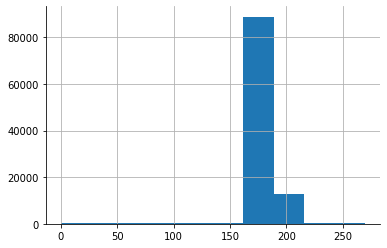

In [5]:
teachers['DAYS_WORKED'].hist()
sns.despine();

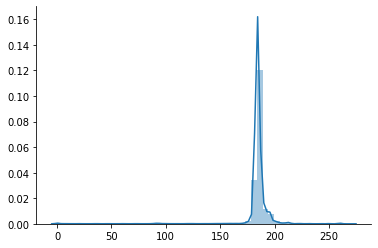

In [6]:
sns.distplot(teachers['DAYS_WORKED'].values)
sns.despine()

### Also curious about hours worked per day:

In [7]:
teachers['HOURS_WORKED_PER_DAY'].value_counts()

7.50     37056
7.00     17542
8.00     12906
7.25     10162
7.33      3956
7.75      3130
6.75      2309
6.25      2129
6.50      1979
7.67      1492
1.00       870
3.75       734
6.00       683
3.50       639
7.42       624
4.00       538
7.08       459
7.30       379
7.17       329
7.34       290
2.00       223
3.00       220
8.50       196
7.10       189
7.58       170
1.50       155
4.50       151
5.00       148
7.60       140
2.50       131
0.25       130
5.50       130
0.75       117
0.00       114
3.63       111
1.75        96
7.20        93
6.92        79
6.60        77
2.90        66
3.88        63
3.25        60
3.62        60
5.25        59
0.50        59
7.77        57
7.66        57
1.25        56
7.16        54
2.25        50
4.35        49
6.91        48
6.30        45
1.87        40
1.60        38
2.80        38
5.63        38
3.87        36
3.67        35
4.20        34
6.57        34
1.45        34
4.80        33
2.75        33
6.40        32
2.33        31
4.25      

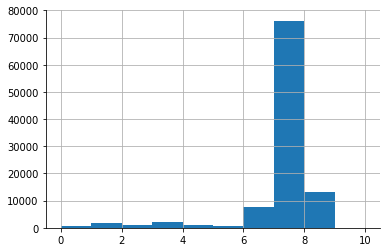

In [8]:
teachers['HOURS_WORKED_PER_DAY'].hist()
sns.despine();

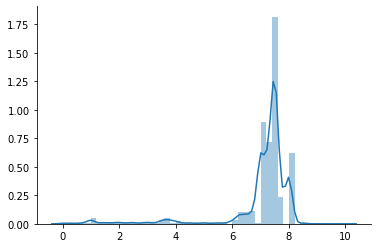

In [9]:
sns.distplot(teachers['HOURS_WORKED_PER_DAY'].values)
sns.despine()

#### So it appears most teachers work at least 7 hours per day

#### Based on these findings, we should probably limit our data set to "full-time" teachers.  We will define full-time to mean having worked at least 180 days out of the year and at least 7 hours per day:

### Limit to just full-time teachers:

In [10]:
full_time = teachers.query("HOURS_WORKED_PER_DAY >=7 and DAYS_WORKED >= 180")

### Let's calculate hourly rate:

In [11]:
full_time = full_time.assign(TOTAL_HOURS_WORKED = full_time['DAYS_WORKED'] * full_time['HOURS_WORKED_PER_DAY'])
full_time = full_time.assign(HRLY_RATE = full_time['PAY_AMOUNT'] / full_time['TOTAL_HOURS_WORKED'])

In [12]:
full_time.shape

(86372, 13)

In [13]:
full_time.head()

,LAST_NAME,FIRST_NAME,EDUCATION_LEVEL,JOB_DESCRIPTION,DISTRICT_NAME,COUNTY,SCHOOL_NAME,CITY_NAME,DAYS_WORKED,HOURS_WORKED_PER_DAY,PAY_AMOUNT,TOTAL_HOURS_WORKED,HRLY_RATE
4,BAUER,RICHARD,Masters,Teacher Assignment,North Olmsted City,Cuyahoga,North Olmsted Middle School,North Olmsted,185,7.50,97931.0,1387.50,70.580901
7,HOGUE,LESLIE,Masters,Teacher Assignment,Beavercreek City,Greene,Jacob Coy Middle School,Xenia,184,7.50,88369.0,1380.00,64.035507
10,Sciarretta,Teresa,Masters,Teacher Assignment,Springboro Community City,Warren,Dennis,Springboro,185,7.25,80247.0,1341.25,59.830009
11,LUTZ-HACKETT,ELIZABETH,Masters,Teacher Assignment,Yellow Springs Exempted Village,Greene,Yellow Springs/McKinney High School,Yellow Springs,184,7.00,82682.0,1288.00,64.194099
13,JENKINS,JENNIFER,Masters,Teacher Assignment,Trotwood-Madison City,Montgomery,Trotwood-Madison Middle School,Trotwood,186,7.00,61490.0,1302.00,47.227343


In [14]:
full_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86372 entries, 4 to 350260
Data columns (total 13 columns):
LAST_NAME               86368 non-null object
FIRST_NAME              86370 non-null object
EDUCATION_LEVEL         86372 non-null object
JOB_DESCRIPTION         86372 non-null object
DISTRICT_NAME           86372 non-null object
COUNTY                  86370 non-null object
SCHOOL_NAME             86372 non-null object
CITY_NAME               86372 non-null object
DAYS_WORKED             86372 non-null int64
HOURS_WORKED_PER_DAY    86372 non-null float64
PAY_AMOUNT              86372 non-null float64
TOTAL_HOURS_WORKED      86372 non-null float64
HRLY_RATE               86372 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 9.2+ MB


### Let's now make pivot table to obtain median pay and median hourly rate:

In [15]:
teachers_by_district = full_time.pivot_table(index=['DISTRICT_NAME'], values=['PAY_AMOUNT','HRLY_RATE'],
                                            aggfunc=['median'])

In [16]:
teachers_by_district

median           
                                                    HRLY_RATE PAY_AMOUNT
DISTRICT_NAME                                                           
A+ Arts Academy                                     26.497696  36517.000
A+ Children's Academy                               24.038462  35000.000
Academy for Urban Scholars Youngstown               29.029304  43750.000
Academy of Educational Excellence                   22.297297  32500.000
Achieve Career Preparatory Academy                  21.794872  34000.000
Ada Exempted Village                                42.915483  58901.500
Adams County Ohio Valley Local                      42.484249  59232.000
Adena Local                                         43.243842  58187.000
Akron City                                          49.357193  70334.000
Akron Digital Academy                               26.375329  40090.500
Akron Preparatory School                            22.235007  35000.000
Akros Middle School                                 24.408015  33500.000
Albert Einstein Academy for Letters, Arts and S...  23.648649  34636.000
Alexander Local                                     48.338017  61921.000
Allen County ESC                                    42.272370  53855.000
Allen East Local                                    43.837874  58243.000
Alliance City                                       41.808288  58009.000
Alternative Education Academy                       24.907488  40250.500
Amanda-Clearcreek Local                             38.881159  53656.000
Amherst Exempted Village                            56.186335  72368.000
Anna Local                                          50.575311  66185.000
Ansonia Local                                       23.509189  32619.000
Anthony Wayne Local                                 51.668107  73406.000
Antwerp Local                                       42.149137  53698.000
Apex Academy                                        30.557005  44491.000
Apollo                                              47.844653  61289.000
Arcadia Local                                       42.617122  58492.000
Arcanum-Butler Local                                46.679160  62270.000
Archbold-Area Local                                 47.836442  63467.000
Arlington Local                                     31.511840  43250.000
Arts & College Preparatory Academy                   0.016622     25.000
Ashland City                                        44.901261  62120.000
Ashland County-West Holmes                          46.052303  58993.000
Ashtabula Area City                                 45.000000  58275.000
Ashtabula County ESC                                42.654503  54939.000
Ashtabula County Technical and Career Center        48.618267  62280.000
Athens City                                         51.676557  71115.000
Athens-Meigs ESC                                    24.069859  31794.000
Auburn                                              52.344505  72628.000
Auglaize County ESC                                 37.177536  51305.000
Aurora Academy                                      19.946809  30000.000
Aurora City                                         63.875676  82719.000
Austintown Local Schools                            39.400000  54372.000
Autism Model School                                 18.164272  37713.000
Avon Lake City                                      50.772973  75144.000
Avon Local                                          45.310145  62528.000
Ayersville Local                                    47.274005  60558.000
Barberton City                                      49.618739  68846.000
Barnesville Exempted Village                        40.659420  56110.000
Batavia Local                                       46.279537  59932.000
Bath Local                                          43.541392  59434.000
Bay Village City                                    56.923128  85157.000
Beachwood City                          

### Let's remove the unnecessary column row:

In [17]:
teachers_by_district.columns

MultiIndex(levels=[['median'], ['HRLY_RATE', 'PAY_AMOUNT']],
           codes=[[0, 0], [0, 1]])

In [18]:
teachers_by_district.columns.set_levels(['MEDIAN_HRLY_RATE', 'MEDIAN_PAY'], level=1, inplace=True)

In [19]:
teachers_by_district

median           
                                                   MEDIAN_HRLY_RATE MEDIAN_PAY
DISTRICT_NAME                                                                 
A+ Arts Academy                                           26.497696  36517.000
A+ Children's Academy                                     24.038462  35000.000
Academy for Urban Scholars Youngstown                     29.029304  43750.000
Academy of Educational Excellence                         22.297297  32500.000
Achieve Career Preparatory Academy                        21.794872  34000.000
Ada Exempted Village                                      42.915483  58901.500
Adams County Ohio Valley Local                            42.484249  59232.000
Adena Local                                               43.243842  58187.000
Akron City                                                49.357193  70334.000
Akron Digital Academy                                     26.375329  40090.500
Akron Preparatory School                                  22.235007  35000.000
Akros Middle School                                       24.408015  33500.000
Albert Einstein Academy for Letters, Arts and S...        23.648649  34636.000
Alexander Local                                           48.338017  61921.000
Allen County ESC                                          42.272370  53855.000
Allen East Local                                          43.837874  58243.000
Alliance City                                             41.808288  58009.000
Alternative Education Academy                             24.907488  40250.500
Amanda-Clearcreek Local                                   38.881159  53656.000
Amherst Exempted Village                                  56.186335  72368.000
Anna Local                                                50.575311  66185.000
Ansonia Local                                             23.509189  32619.000
Anthony Wayne Local                                       51.668107  73406.000
Antwerp Local                                             42.149137  53698.000
Apex Academy                                              30.557005  44491.000
Apollo                                                    47.844653  61289.000
Arcadia Local                                             42.617122  58492.000
Arcanum-Butler Local                                      46.679160  62270.000
Archbold-Area Local                                       47.836442  63467.000
Arlington Local                                           31.511840  43250.000
Arts & College Preparatory Academy                         0.016622     25.000
Ashland City                                              44.901261  62120.000
Ashland County-West Holmes                                46.052303  58993.000
Ashtabula Area City                                       45.000000  58275.000
Ashtabula County ESC                                      42.654503  54939.000
Ashtabula County Technical and Career Center              48.618267  62280.000
Athens City                                               51.676557  71115.000
Athens-Meigs ESC                                          24.069859  31794.000
Auburn                                                    52.344505  72628.000
Auglaize County ESC                                       37.177536  51305.000
Aurora Academy                                            19.946809  30000.000
Aurora City                                               63.875676  82719.000
Austintown Local Schools                                  39.400000  54372.000
Autism Model School                                       18.164272  37713.000
Avon Lake City                                            50.772973  75144.000
Avon Local                                                45.310145  62528.000
Ayersville Local                                          47.274005  60558.000
Barberton City                                            49.618739  68846.000
Barnesville Exempted Village    

In [20]:
teachers_by_district.columns = teachers_by_district.columns.droplevel(level=0)

In [21]:
teachers_by_district

,MEDIAN_HRLY_RATE,MEDIAN_PAY
DISTRICT_NAME,,
A+ Arts Academy,26.497696,36517.000
A+ Children's Academy,24.038462,35000.000
Academy for Urban Scholars Youngstown,29.029304,43750.000
Academy of Educational Excellence,22.297297,32500.000
Achieve Career Preparatory Academy,21.794872,34000.000
Ada Exempted Village,42.915483,58901.500
Adams County Ohio Valley Local,42.484249,59232.000
Adena Local,43.243842,58187.000
Akron City,49.357193,70334.000


### Let's add district name and county to our data set:

In [22]:
district_info = full_time[['DISTRICT_NAME', 'COUNTY']].drop_duplicates()

In [23]:
district_info.head()

,DISTRICT_NAME,COUNTY
4,North Olmsted City,Cuyahoga
7,Beavercreek City,Greene
10,Springboro Community City,Warren
11,Yellow Springs Exempted Village,Greene
13,Trotwood-Madison City,Montgomery


In [24]:
teachers_by_district = pd.merge(teachers_by_district, district_info, how='left', left_index=True,
                               right_on=['DISTRICT_NAME'])

In [25]:
teachers_by_district.head()

,MEDIAN_HRLY_RATE,MEDIAN_PAY,DISTRICT_NAME,COUNTY
47819,26.497696,36517.0,A+ Arts Academy,Franklin
77986,24.038462,35000.0,A+ Children's Academy,Franklin
140002,29.029304,43750.0,Academy for Urban Scholars Youngstown,Mahoning
29321,22.297297,32500.0,Academy of Educational Excellence,Lucas
76586,21.794872,34000.0,Achieve Career Preparatory Academy,Lucas


### Finally, let's add ```COUNT``` column:

In [26]:
counts_by_district = full_time.pivot_table(index='DISTRICT_NAME', values=['PAY_AMOUNT'], aggfunc='count')

In [27]:
counts_by_district.rename({'PAY_AMOUNT': 'COUNT'}, axis='columns', inplace=True)
counts_by_district

,COUNT
DISTRICT_NAME,
A+ Arts Academy,17
A+ Children's Academy,9
Academy for Urban Scholars Youngstown,2
Academy of Educational Excellence,5
Achieve Career Preparatory Academy,5
Ada Exempted Village,52
Adams County Ohio Valley Local,215
Adena Local,51
Akron City,1521


In [28]:
teachers_by_district = pd.merge(teachers_by_district, counts_by_district, how='left', left_on=['DISTRICT_NAME'],
                               right_index=True)

In [29]:
teachers_by_district

,MEDIAN_HRLY_RATE,MEDIAN_PAY,DISTRICT_NAME,COUNTY,COUNT
47819,26.497696,36517.000,A+ Arts Academy,Franklin,17
77986,24.038462,35000.000,A+ Children's Academy,Franklin,9
140002,29.029304,43750.000,Academy for Urban Scholars Youngstown,Mahoning,2
29321,22.297297,32500.000,Academy of Educational Excellence,Lucas,5
76586,21.794872,34000.000,Achieve Career Preparatory Academy,Lucas,5
1348,42.915483,58901.500,Ada Exempted Village,Hardin,52
5997,42.484249,59232.000,Adams County Ohio Valley Local,Adams,215
4603,43.243842,58187.000,Adena Local,Ross,51
59,49.357193,70334.000,Akron City,Summit,1521
25748,26.375329,40090.500,Akron Digital Academy,Summit,6


### Let's view our final data, sorted by median pay in descending order:

In [30]:
teachers_by_district.sort_values(by='MEDIAN_PAY', ascending=False)

,MEDIAN_HRLY_RATE,MEDIAN_PAY,DISTRICT_NAME,COUNTY,COUNT
7000,69.070678,96863.500,Beachwood City,Cuyahoga,104
3824,66.520663,95374.000,Orange City,Cuyahoga,138
2565,63.895495,91236.000,Polaris,Cuyahoga,47
810,60.135081,89481.000,Upper Arlington City,Franklin,347
998,63.818885,88703.500,Rocky River City,Cuyahoga,138
1610,61.218919,88588.000,Shaker Heights City,Cuyahoga,323
171,63.786667,88504.000,Mayfield City,Cuyahoga,238
279,60.633333,87312.000,Cleveland Heights-University Heights City,Cuyahoga,363
407,62.545520,87251.000,Solon City,Cuyahoga,240
1815,66.986100,86747.000,Indian Hill Exempted Village,Hamilton,122


### and view our data, sorted by median hourly rate in descending order:

In [31]:
teachers_by_district.sort_values(by='MEDIAN_HRLY_RATE', ascending=False)

,MEDIAN_HRLY_RATE,MEDIAN_PAY,DISTRICT_NAME,COUNTY,COUNT
7000,69.070678,96863.500,Beachwood City,Cuyahoga,104
329,67.142857,86480.000,Hilliard City,Franklin,809
1815,66.986100,86747.000,Indian Hill Exempted Village,Hamilton,122
3824,66.520663,95374.000,Orange City,Cuyahoga,138
226,64.126050,83941.000,Medina County Joint Vocational School District,Medina,55
2565,63.895495,91236.000,Polaris,Cuyahoga,47
3979,63.875676,82719.000,Aurora City,Portage,138
866,63.827799,82657.000,Maumee City,Lucas,121
998,63.818885,88703.500,Rocky River City,Cuyahoga,138
171,63.786667,88504.000,Mayfield City,Cuyahoga,238


In [32]:
top_median_salary = teachers_by_district.sort_values(by='MEDIAN_PAY', ascending=False)

In [33]:
top_median_hrly_rate = teachers_by_district.sort_values(by='MEDIAN_HRLY_RATE', ascending=False)

In [34]:
top_median_salary[:20]

,MEDIAN_HRLY_RATE,MEDIAN_PAY,DISTRICT_NAME,COUNTY,COUNT
7000,69.070678,96863.5,Beachwood City,Cuyahoga,104
3824,66.520663,95374.0,Orange City,Cuyahoga,138
2565,63.895495,91236.0,Polaris,Cuyahoga,47
810,60.135081,89481.0,Upper Arlington City,Franklin,347
998,63.818885,88703.5,Rocky River City,Cuyahoga,138
1610,61.218919,88588.0,Shaker Heights City,Cuyahoga,323
171,63.786667,88504.0,Mayfield City,Cuyahoga,238
279,60.633333,87312.0,Cleveland Heights-University Heights City,Cuyahoga,363
407,62.545520,87251.0,Solon City,Cuyahoga,240
1815,66.986100,86747.0,Indian Hill Exempted Village,Hamilton,122


### Let's modify our index label to be 1 to n:

In [35]:
top_median_salary = top_median_salary[['DISTRICT_NAME', 'COUNTY', 'MEDIAN_HRLY_RATE', 'MEDIAN_PAY', 'COUNT']]
top_median_salary.index = list(range(1, len(top_median_salary.index) +1))

In [36]:
top_median_salary[:20]

,DISTRICT_NAME,COUNTY,MEDIAN_HRLY_RATE,MEDIAN_PAY,COUNT
1,Beachwood City,Cuyahoga,69.070678,96863.5,104
2,Orange City,Cuyahoga,66.520663,95374.0,138
3,Polaris,Cuyahoga,63.895495,91236.0,47
4,Upper Arlington City,Franklin,60.135081,89481.0,347
5,Rocky River City,Cuyahoga,63.818885,88703.5,138
6,Shaker Heights City,Cuyahoga,61.218919,88588.0,323
7,Mayfield City,Cuyahoga,63.786667,88504.0,238
8,Cleveland Heights-University Heights City,Cuyahoga,60.633333,87312.0,363
9,Solon City,Cuyahoga,62.545520,87251.0,240
10,Indian Hill Exempted Village,Hamilton,66.986100,86747.0,122


In [37]:
top_median_hrly_rate = top_median_hrly_rate[['DISTRICT_NAME', 'COUNTY', 'MEDIAN_HRLY_RATE', 'MEDIAN_PAY', 'COUNT']]
top_median_hrly_rate.index = list(range(1, len(top_median_hrly_rate.index) +1))

In [38]:
top_median_hrly_rate[:20]

,DISTRICT_NAME,COUNTY,MEDIAN_HRLY_RATE,MEDIAN_PAY,COUNT
1,Beachwood City,Cuyahoga,69.070678,96863.5,104
2,Hilliard City,Franklin,67.142857,86480.0,809
3,Indian Hill Exempted Village,Hamilton,66.986100,86747.0,122
4,Orange City,Cuyahoga,66.520663,95374.0,138
5,Medina County Joint Vocational School District,Medina,64.126050,83941.0,55
6,Polaris,Cuyahoga,63.895495,91236.0,47
7,Aurora City,Portage,63.875676,82719.0,138
8,Maumee City,Lucas,63.827799,82657.0,121
9,Rocky River City,Cuyahoga,63.818885,88703.5,138
10,Mayfield City,Cuyahoga,63.786667,88504.0,238


In [39]:
top_20_median_salary = top_median_salary[:20].reset_index(drop=True)
top_20_median_salary.index += 1

In [40]:
top_20_median_salary

,DISTRICT_NAME,COUNTY,MEDIAN_HRLY_RATE,MEDIAN_PAY,COUNT
1,Beachwood City,Cuyahoga,69.070678,96863.5,104
2,Orange City,Cuyahoga,66.520663,95374.0,138
3,Polaris,Cuyahoga,63.895495,91236.0,47
4,Upper Arlington City,Franklin,60.135081,89481.0,347
5,Rocky River City,Cuyahoga,63.818885,88703.5,138
6,Shaker Heights City,Cuyahoga,61.218919,88588.0,323
7,Mayfield City,Cuyahoga,63.786667,88504.0,238
8,Cleveland Heights-University Heights City,Cuyahoga,60.633333,87312.0,363
9,Solon City,Cuyahoga,62.545520,87251.0,240
10,Indian Hill Exempted Village,Hamilton,66.986100,86747.0,122


### Persist the top 20 median salaray html report by "glue"ing it to this notebook:

In [41]:
sb.glue("HTML_Report", top_20_median_salary.to_html())